# Exploratory Data Analysis (EDA)

## Flows:

### 1. DATA PROFILES

### 2. DATA RELATIONSHIPS

### 3. IDENTIFYING AND CREATING FEATURES

###


In [1]:
# First, import the relevant modules and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#suppress future warnings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [2]:
# Import Austin_TX_House_Listings_data_v1.csv & us_income_zipcode.csv
df_with_null = pd.read_csv('../03_processed_data/austin_housePrice_and_income_data.csv', low_memory=False)

In [3]:
df_with_null.shape

(14733, 53)

In [4]:
df_wo_null = df_with_null.dropna()

In [5]:
df_wo_null.shape

(5523, 53)

In [6]:
df = df_with_null.fillna(df_with_null.mean(), inplace=False)
df.shape

(14733, 53)

In [7]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]
print(null_values)

Series([], dtype: int64)


In [8]:
df.head()

,zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,...,zpid,latest_price,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
0,78732,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,4.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,160552.96
1,78732,5.0,5.0,30.355553,4558.0,-97.912544,1.98,2007.0,5.0,5.0,...,70352465.0,1025000.0,8.0,2020.0,0.0,3.0,2.0,28749.6,224.879333,160552.96
2,78732,4.0,4.0,30.352081,4749.0,-97.912048,1.98,2011.0,4.0,3.0,...,70352478.0,825000.0,6.0,2018.0,0.0,1.0,4.0,21344.4,173.720783,160552.96
3,78732,4.0,4.0,30.356226,4867.0,-97.911697,1.98,2009.0,4.0,4.0,...,70352461.0,849000.0,8.0,2019.0,0.0,4.0,7.0,20908.8,174.440107,160552.96
4,78732,4.0,5.0,30.341896,3485.0,-97.907944,1.98,2009.0,4.0,3.0,...,89028960.0,625000.0,7.0,2019.0,0.0,4.0,4.0,7797.0,179.340029,160552.96


In [9]:
df.tail()

,zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,...,zpid,latest_price,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
14728,78749,2.0,3.0,30.224886,1496.0,-97.862335,1.98,1988.0,2.000000,0.0,...,29483690.0,292500.0,1.0,2018.0,0.0,0.0,1.0,5662.0,195.521390,102620.79
14729,78749,2.0,3.0,30.221336,2270.0,-97.879677,1.98,1999.0,2.000000,0.0,...,29484499.0,425000.0,1.0,2018.0,0.0,3.0,1.0,23522.4,187.224670,102620.79
14730,78749,2.0,4.0,30.216406,2645.0,-97.876045,1.98,1993.0,2.000000,0.0,...,29487158.0,424999.0,1.0,2018.0,0.0,3.0,1.0,9321.0,160.680151,102620.79
14731,78749,2.0,3.0,30.213816,1469.0,-97.873711,1.98,1992.0,2.000000,2.0,...,29491564.0,316000.0,1.0,2018.0,0.0,5.0,5.0,10280.0,215.112321,102620.79
14732,78749,2.5,3.0,30.218878,1700.0,-97.864960,1.98,1986.0,2.640274,0.0,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,102620.79


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14733 entries, 0 to 14732
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   zipcode                                    14733 non-null  int64  
 1   bathrooms                                  14733 non-null  float64
 2   bedrooms                                   14733 non-null  float64
 3   latitude                                   14733 non-null  float64
 4   livingArea                                 14733 non-null  float64
 5   longitude                                  14733 non-null  float64
 6   propertyTaxRate                            14733 non-null  float64
 7   resoFactsStats_atAGlanceFacts_1_factValue  14733 non-null  float64
 8   resoFactsStats_bathrooms                   14733 non-null  float64
 9   resoFactsStats_bathroomsFull               14733 non-null  float64
 10  resoFactsStats_bathroo

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zipcode,14733.0,7.873585e+04,1.909263e+01,7.861700e+04,7.872700e+04,7.873900e+04,7.874900e+04,7.875900e+04
bathrooms,14733.0,2.662282e+00,1.000922e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.700000e+01
bedrooms,14733.0,3.427424e+00,8.222666e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+01
latitude,14733.0,3.029480e+01,9.718974e-02,3.008503e+01,3.020707e+01,3.029100e+01,3.036956e+01,3.051732e+01
livingArea,14733.0,2.153247e+03,1.098136e+03,1.000000e+00,1.460000e+03,1.926000e+03,2.595000e+03,4.500000e+04
longitude,14733.0,-9.777242e+01,7.951308e-02,-9.802206e+01,-9.783155e+01,-9.776600e+01,-9.771461e+01,-9.757063e+01
propertyTaxRate,14733.0,1.994037e+00,5.442868e-02,1.980000e+00,1.980000e+00,1.980000e+00,1.980000e+00,2.210000e+00
resoFactsStats_atAGlanceFacts_1_factValue,14733.0,1.987529e+03,2.763414e+01,0.000000e+00,1.973000e+03,1.992000e+03,2.005000e+03,2.020000e+03
resoFactsStats_bathrooms,14733.0,2.640274e+00,1.026229e+00,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.700000e+01
resoFactsStats_bathroomsFull,14733.0,2.039503e+00,1.013720e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.600000e+01


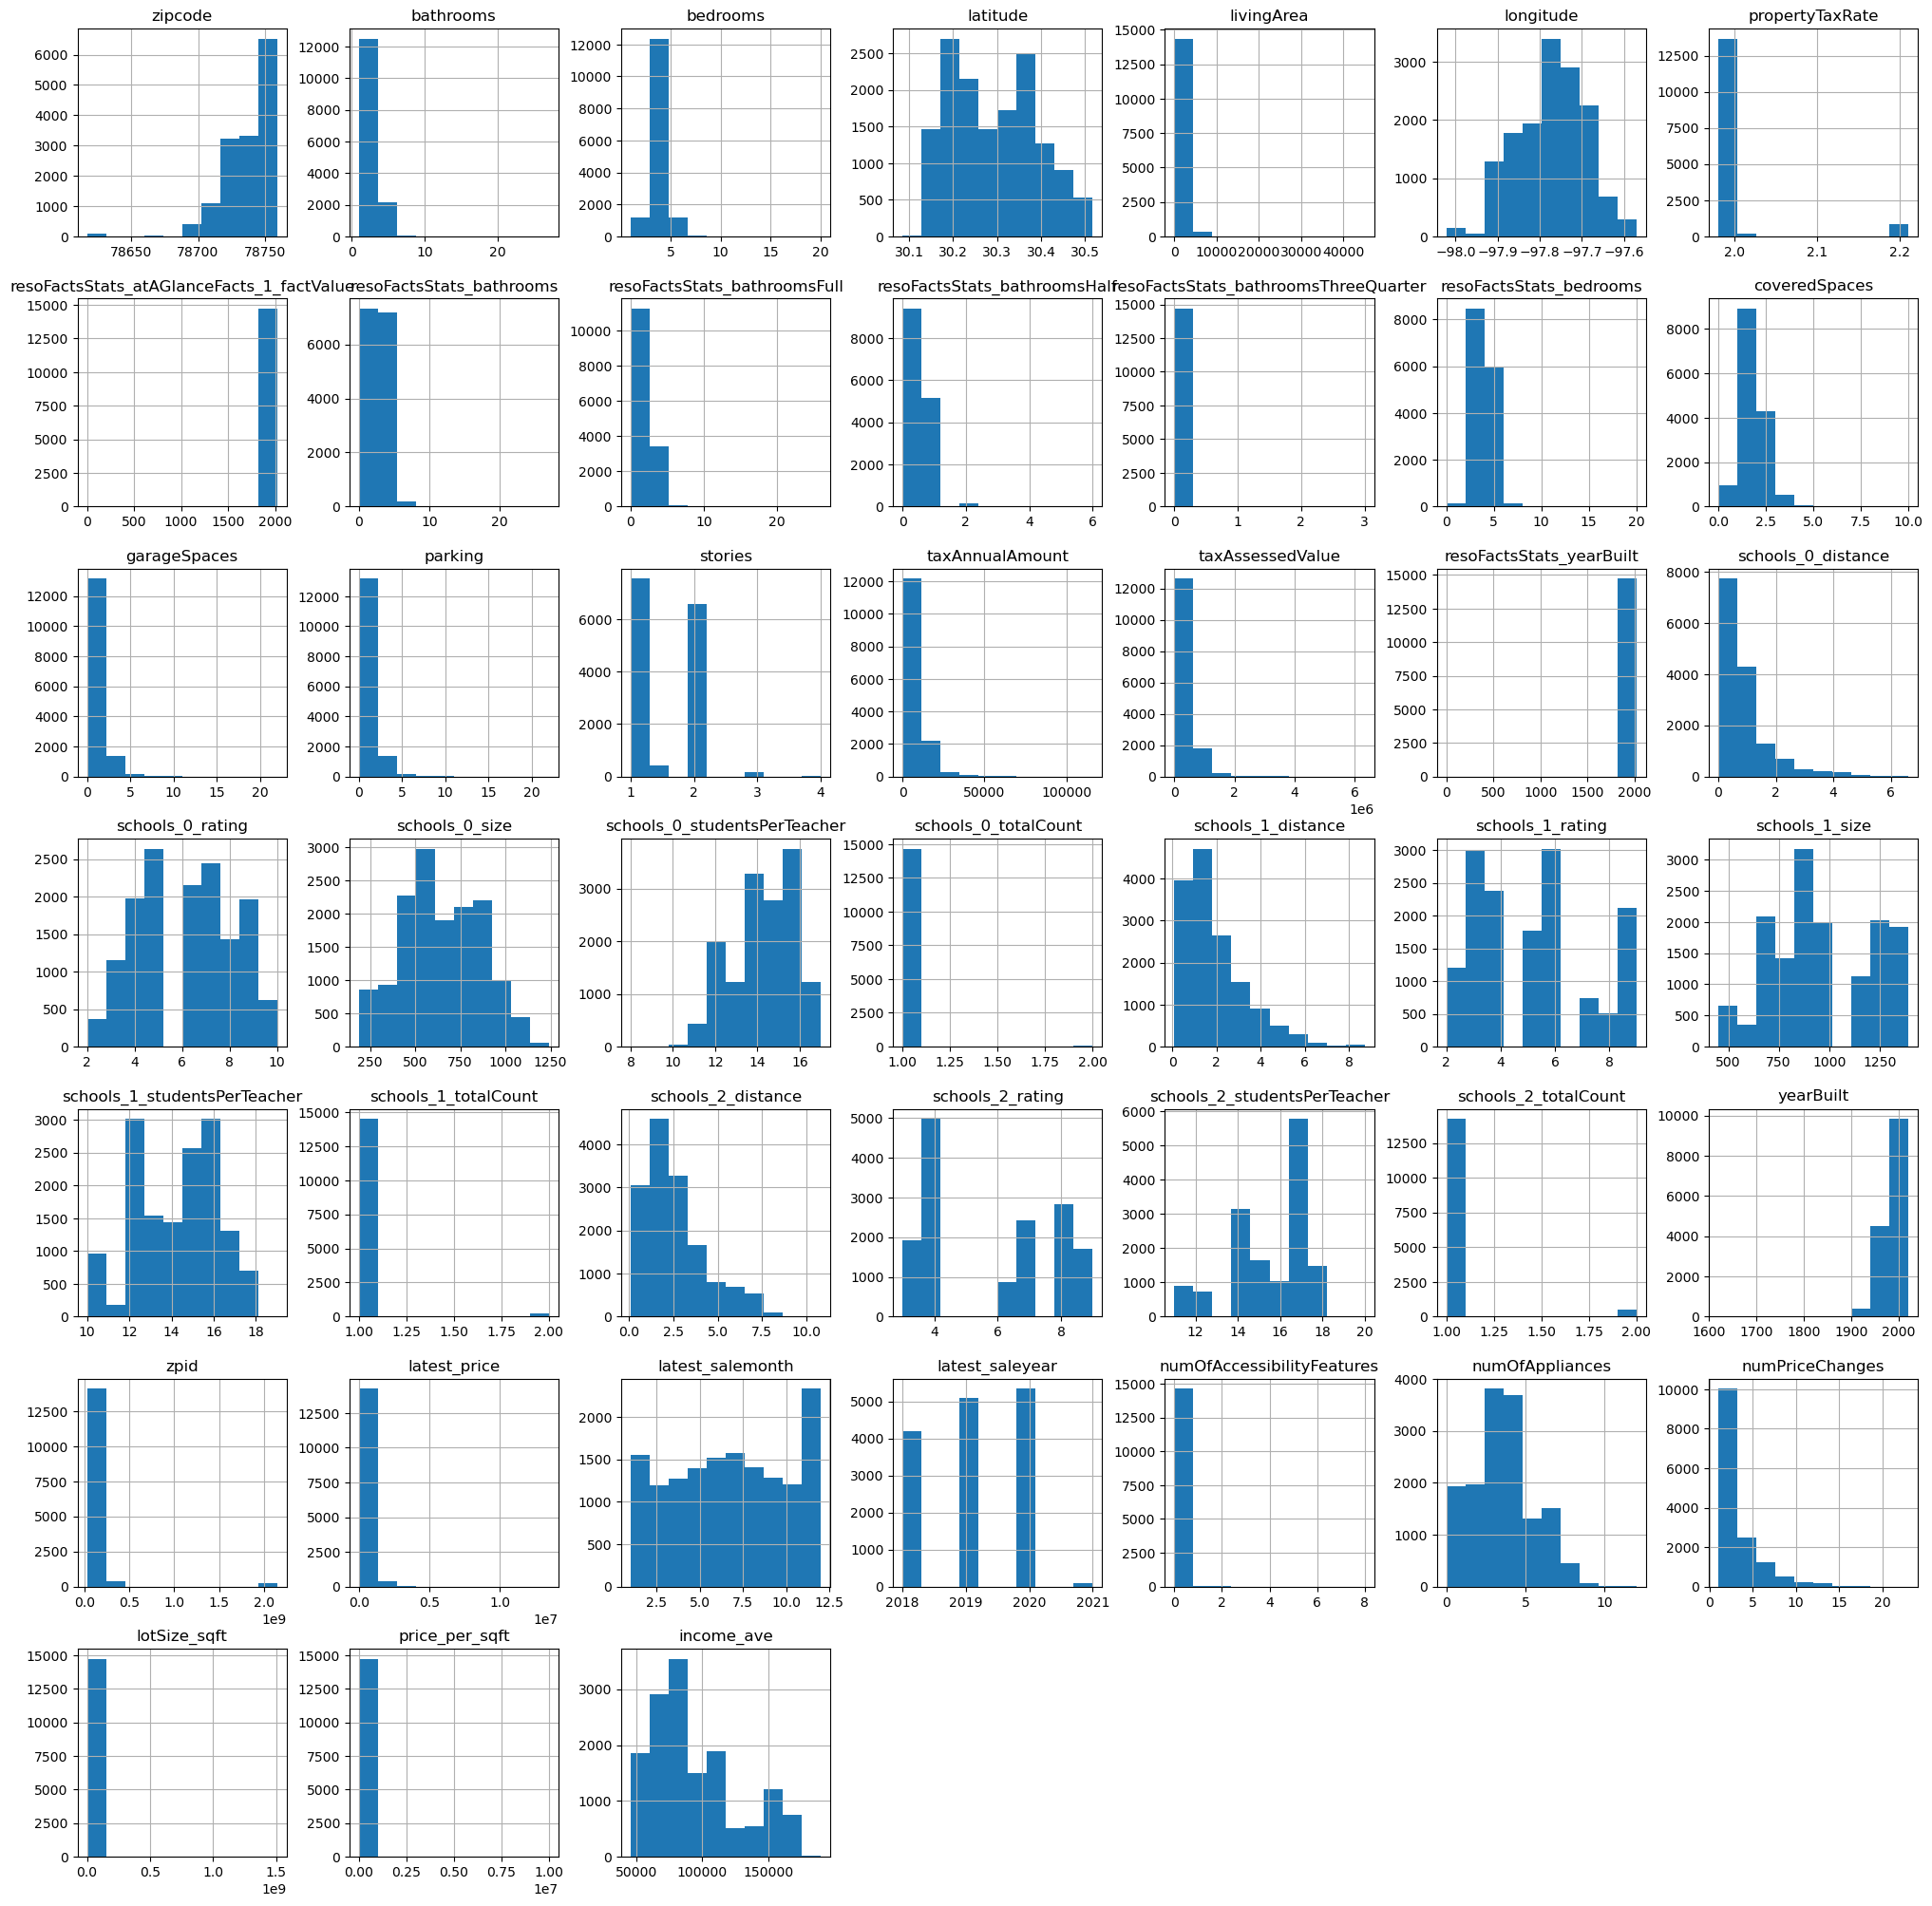

In [12]:
hist = df.hist(bins=10,figsize =(25,25))

In [13]:
df.select_dtypes(include = 'object').count()

Series([], dtype: int64)

In [14]:
#select categorical variables only
#df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
#df_cat.ColumnName.value_counts()
#count plot for one variable
#sns.countplot(data = df_cat, x = 'ColumnName')

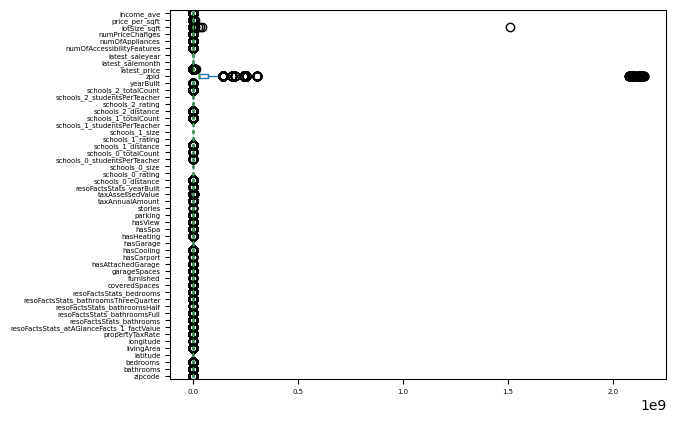

In [15]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=5)

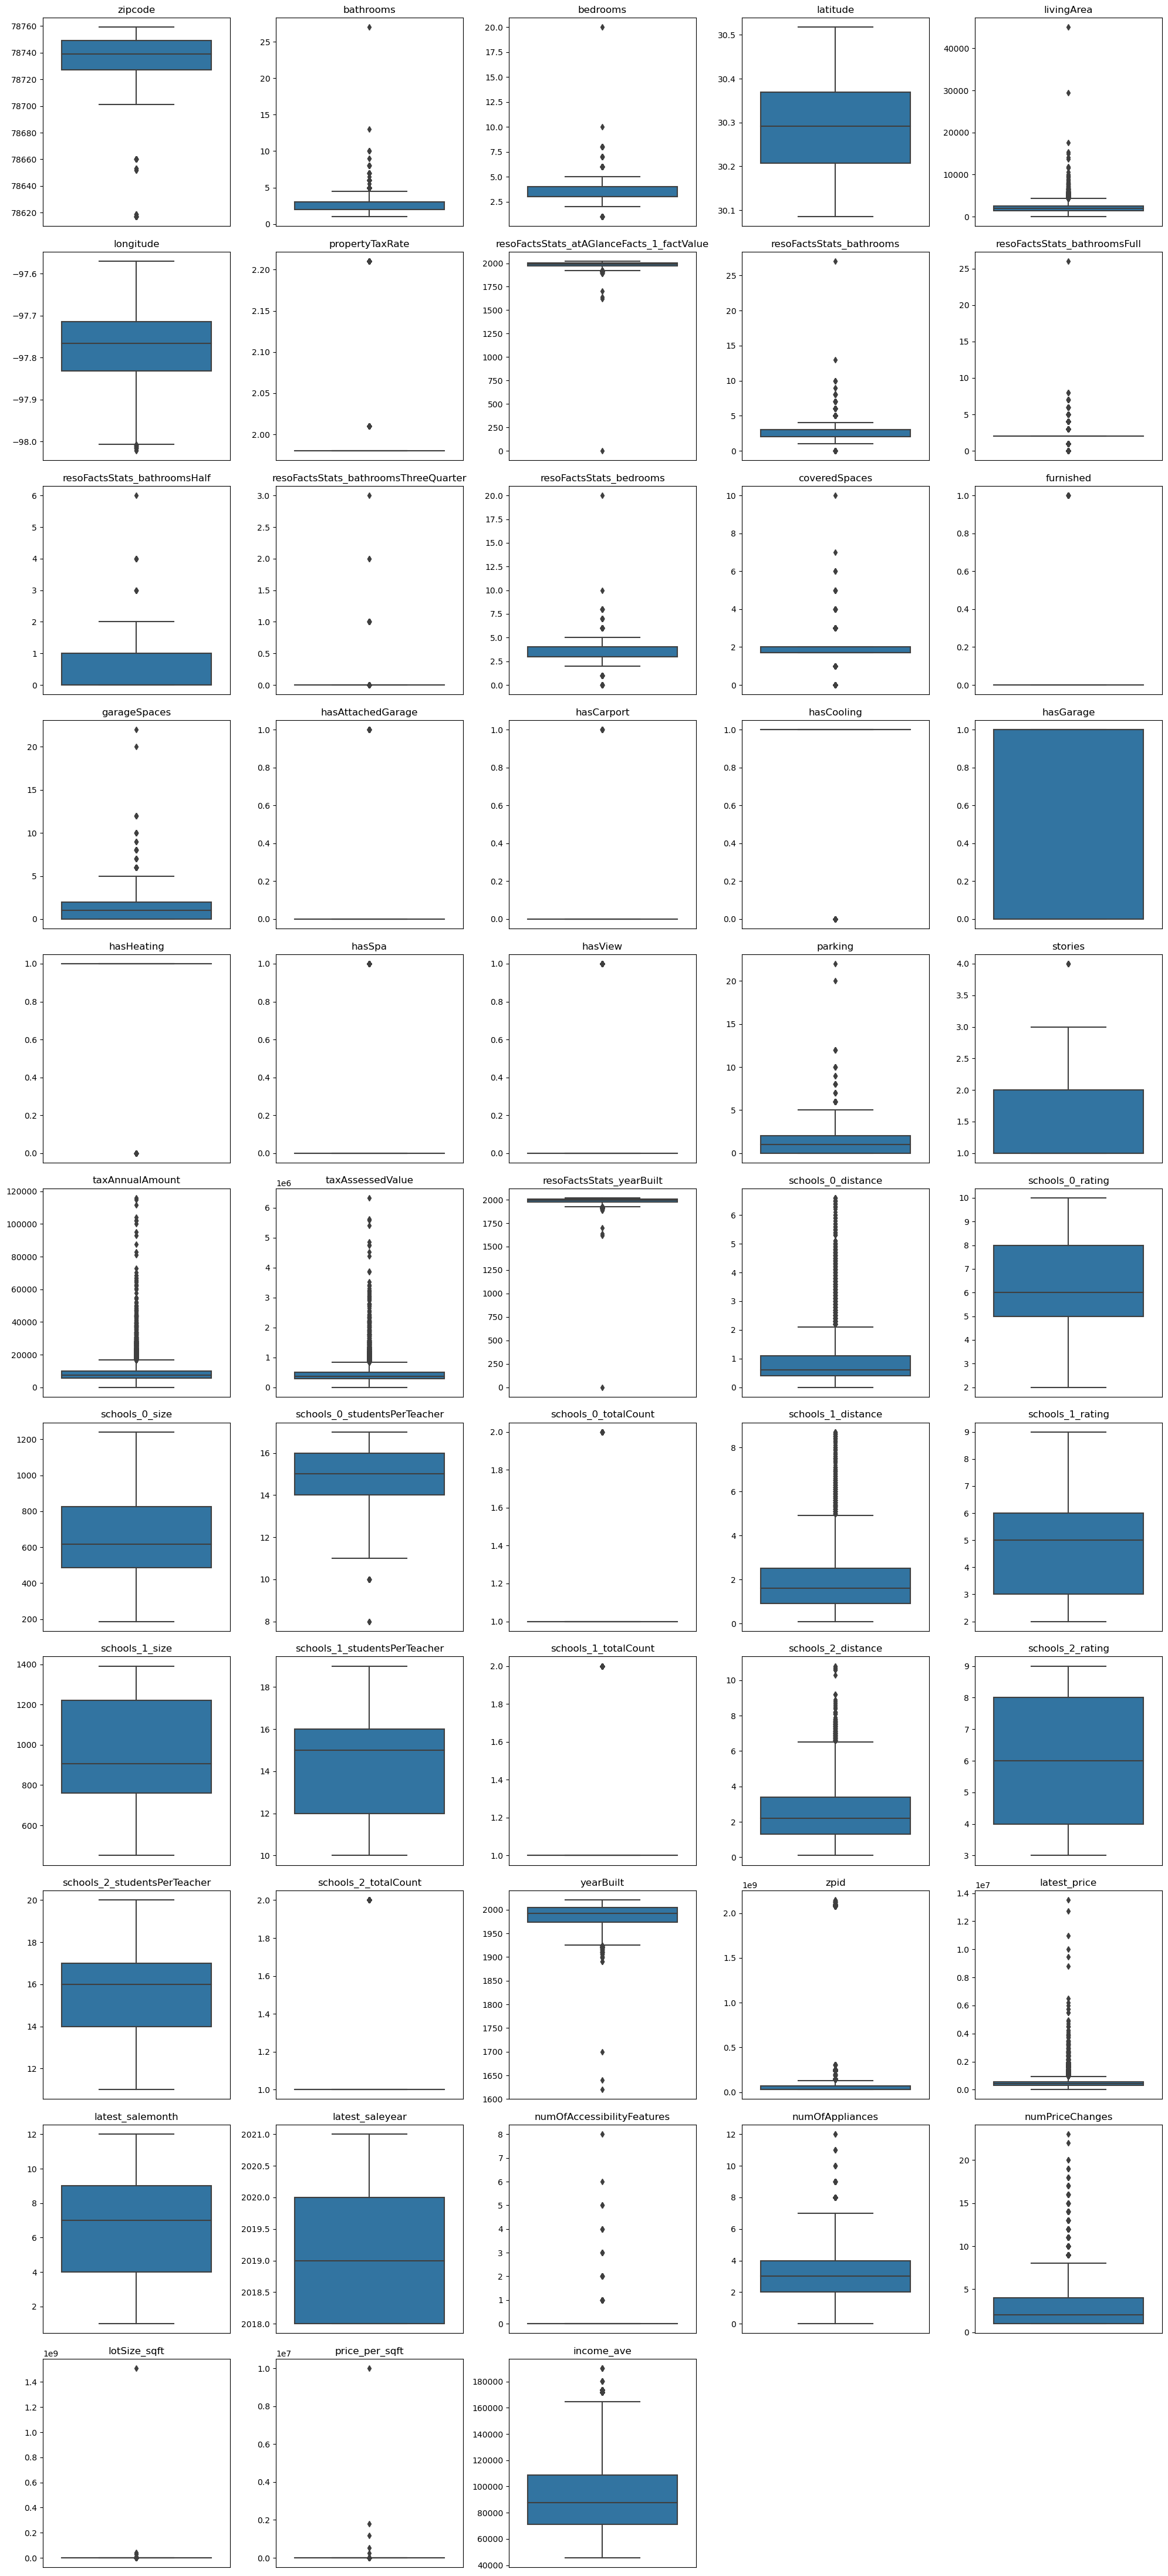

In [16]:
n_cols = 5  # Number of columns of subplots
n_rows = (df.shape[1] + n_cols - 1) // n_cols  # Calculate required rows

plt.figure(figsize=(20, 4 * n_rows))  # Adjust figure size based on number of rows

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create subplot for each column
    sns.boxplot(data=df[column])  # Create box plot for the current column
    plt.title(column)  # Set title for the subplot
    plt.xticks([])  # Optionally hide x-ticks

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plots

### 2. DATA RELATIONSHIPS

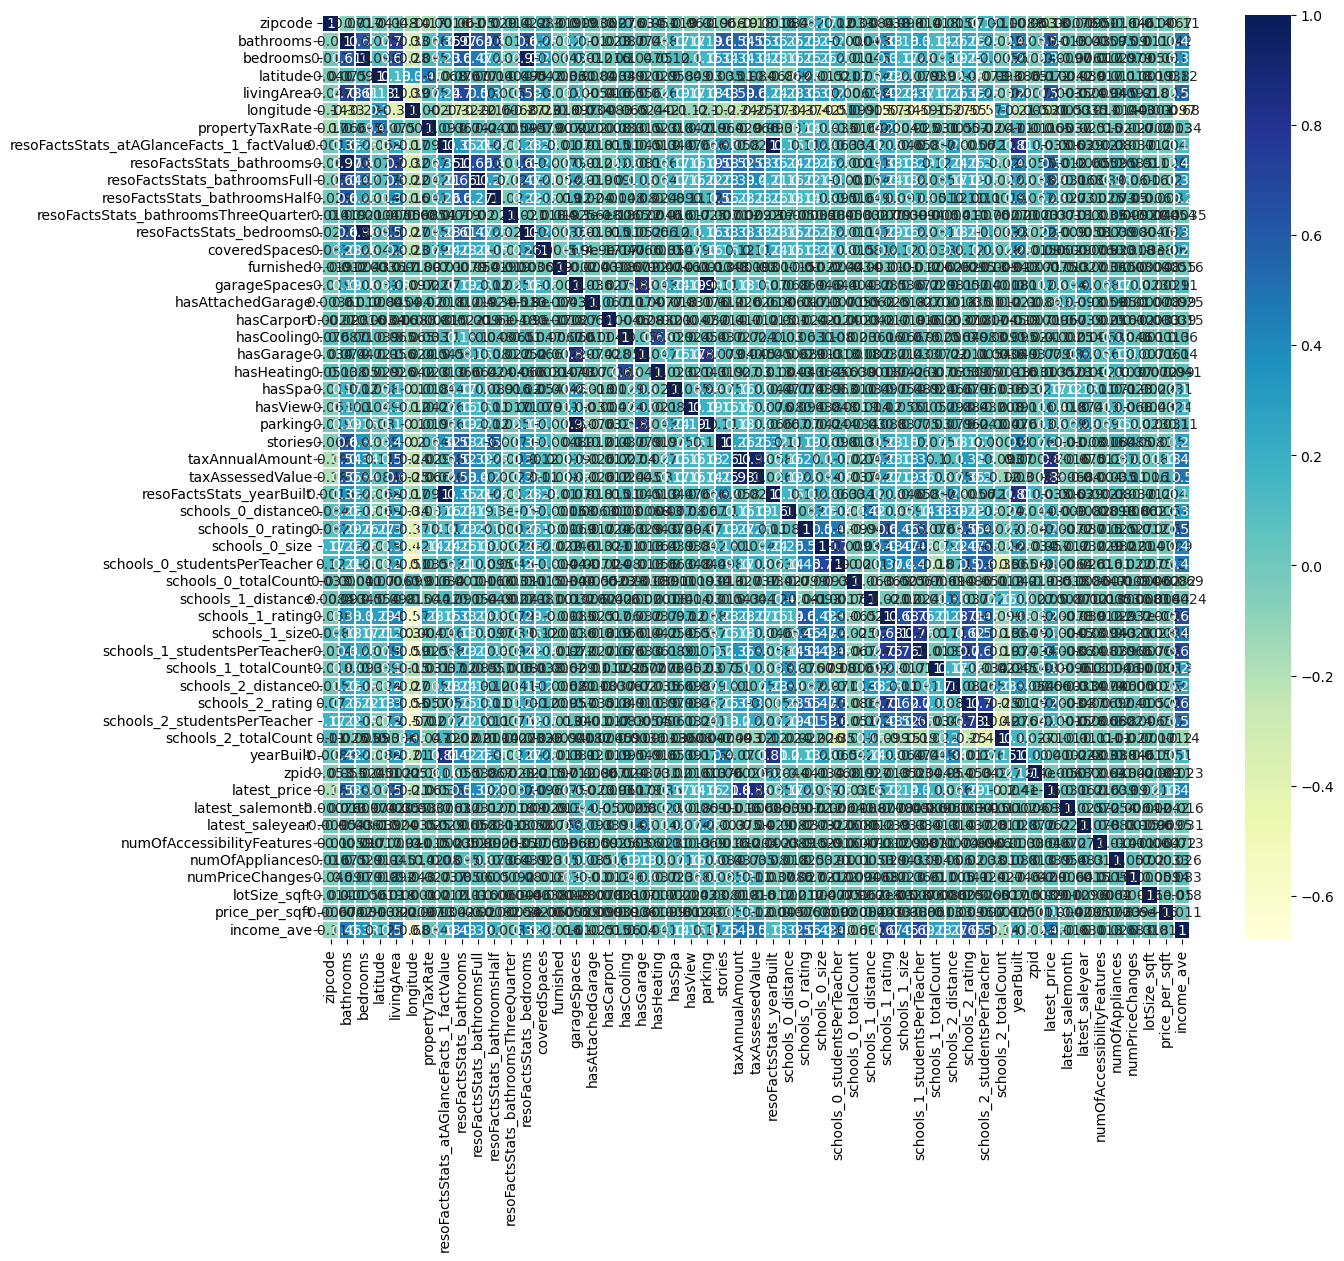

In [17]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [18]:
# Calculate the correlation matrix
#correlation_matrix = df.corr()

# Set up the matplotlib figure
#plt.figure(figsize=(15, 10))

# Draw the heatmap
#sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Show the plot
#plt.title('Correlation Matrix')
#plt.show()

### 3. IDENTIFYING AND CREATING FEATURES

Text(0, 0.5, 'Variance Explained')

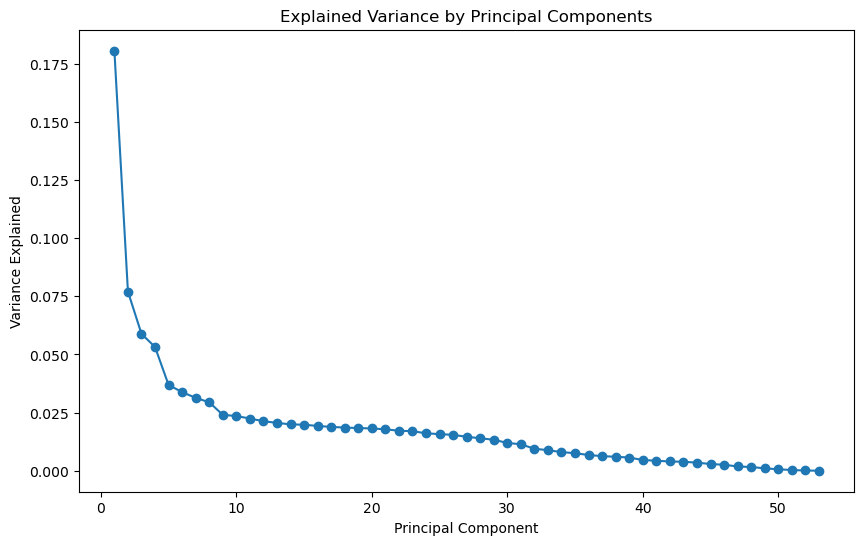

In [19]:
# Standardize the Data andRun PCA 
# to identify essential features to be considered in the model construction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained Variance
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [20]:
scaled_data.shape

(14733, 53)

In [21]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance Explained')

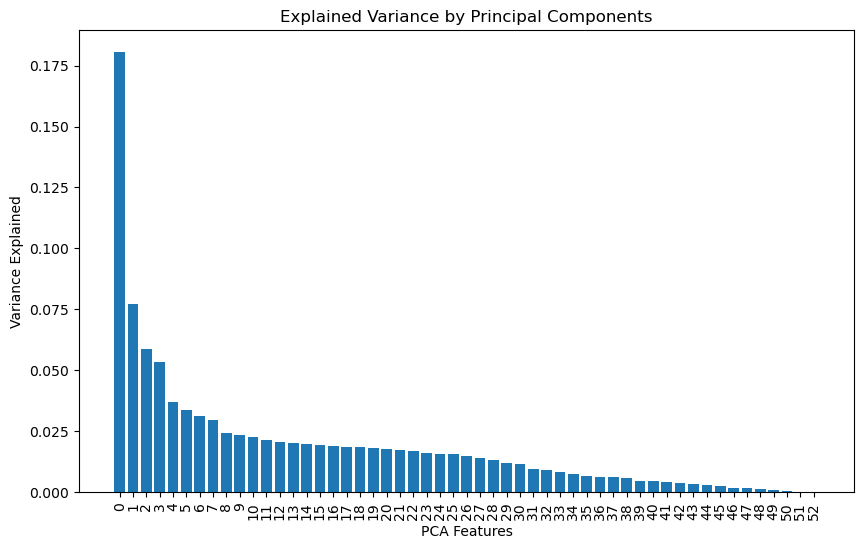

In [22]:
# BarPlot
plt.figure(figsize=(10, 6))
plt.bar(features, explained_variance)
plt.xticks(features, rotation = 90)
plt.title('Explained Variance by Principal Components')
plt.xlabel('PCA Features')
plt.ylabel('Variance Explained')

In [23]:
# Select components based on explained variance threshold
threshold = 0.8  # Select enough components to explain 80% of variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components selected: {n_components}")

Number of components selected: 24


In [24]:
# Fit PCA with selected number of components
pca_comp = PCA(n_components=n_components)
pca_result = pca_comp.fit(scaled_data)

# Examine Loadings
loadings = pd.DataFrame(pca_comp.components_.T, columns=[f'PC_{i+1}' for i in range(n_components)], index=df.columns)

# Display loadings for the selected components
print("\nFeature Loadings for Selected Components:")
print(loadings)


Feature Loadings for Selected Components:
                                               PC_1      PC_2      PC_3  \
zipcode                                   -0.006371  0.071252 -0.121803   
bathrooms                                  0.256159 -0.191079  0.007588   
bedrooms                                   0.203992 -0.124468 -0.005304   
latitude                                   0.039441  0.027960  0.080539   
livingArea                                 0.253532 -0.092515  0.053022   
longitude                                 -0.204449 -0.165447  0.073996   
propertyTaxRate                            0.034825 -0.001707 -0.049928   
resoFactsStats_atAGlanceFacts_1_factValue  0.119155 -0.223143 -0.345431   
resoFactsStats_bathrooms                   0.252621 -0.191810  0.002871   
resoFactsStats_bathroomsFull               0.189134 -0.148151  0.072930   
resoFactsStats_bathroomsHalf               0.145422 -0.160106 -0.043934   
resoFactsStats_bathroomsThreeQuarter       0.002814  0.00

In [25]:
# Save the DataFrame to a CSV file
df.to_csv('../03_processed_data/austin_housePrice_and_income_data_af_EDA.csv', index=False)

print("DataFrame saved to 'austin_housePrice_and_income_data_af_EDA.csv'.")

DataFrame saved to 'austin_housePrice_and_income_data_af_EDA.csv'.
